In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', 100)

df_b = pd.read_csv('../dados/train.csv')
df = df_b.copy()

# Remove os NaN
df.replace("NaN", np.nan, inplace=True)  # converte para np.nan
df.replace("NaN ", np.nan, inplace=True)  # converte para np.nan
df.dropna(inplace=True)  # remove as linhas com NaN real

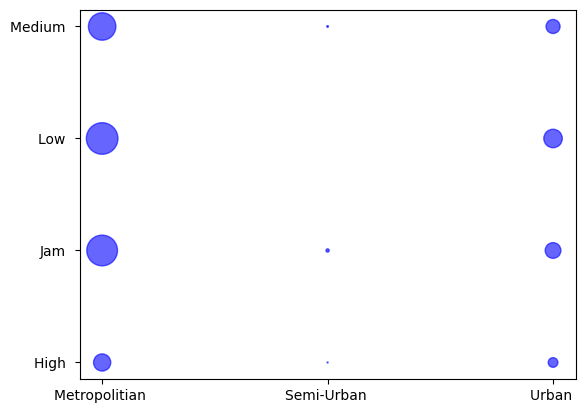

In [11]:
# Comparação do volume de pedidos por cidade e tipo de tráfego.

df_temp = df.loc[:,['City','ID', 'Road_traffic_density']].groupby(['City', 'Road_traffic_density']).count().reset_index()

plt.scatter(
    x=df_temp['City'],
    y=df_temp['Road_traffic_density'],
    s=df_temp['ID'] * 0.5,  # Ajuste de tamanho para melhor visualização
    alpha=0.6,
    c='blue'
)
plt.show()


In [12]:
# A quantidade de pedidos por entregador por semana.

df.loc[:,'Order_Date'] = pd.to_datetime(df.loc[:,'Order_Date'])

df['week_of_year'] = df['Order_Date'].dt.isocalendar().week

df_temp1 = df.loc[:,['ID', 'week_of_year']].groupby('week_of_year').count().reset_index()

df_temp2 = df.loc[:,['Delivery_person_ID', 'week_of_year']].groupby('week_of_year').nunique().reset_index()

df_temp = pd.merge(df_temp1, df_temp2, how ='inner')

df_temp['pedidosEntregador'] = df_temp['ID']/df_temp['Delivery_person_ID']

df_temp

C:\Users\eveli\AppData\Local\Temp\ipykernel_6380\1031271220.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.loc[:,'Order_Date'] = pd.to_datetime(df.loc[:,'Order_Date'])


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# A localização central de cada cidade por tipo de tráfego.

df